j_i = [0.99999, 0.999964061863362, 0.9998708450334985, 0.9995358411166387, 0.9983318994628, 0.9940051574968106, 0.9784556530996812, 0.9225736317318872, 0.7217440597792875, 0.0]
j_f = [1.0197155  1.05045936 1.08633654 1.12519606 1.16518998 1.20278377
 1.2269317  1.19798848 0.96969083 0.        ]


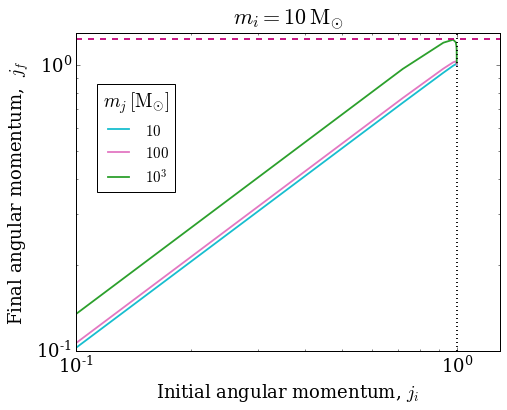

In [33]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from module import *
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 


s_dec_list=np.zeros(len(λ_list))
for i, λ_0 in enumerate(λ_list):
    s_dec_list[i]= S_dec_halo(λ_0)
    
    
#Plot of a_f vs a_i for PBHs of masses M_1PBH=M_2PBH=1M☉. 

M_1PBH_list = [10*M_solar,10*M_solar,10*M_solar]     # in units of kg
M_2PBH_list = [10*M_solar, 100*M_solar, 1000*M_solar]     # in units of kg




def j_final(j_i, λ_0, M_1PBH, M_2PBH):
    
    def s(λ_0): 
        return ((0.03095*λ_0 + 0.3425)*λ_0)

    
    def x(λ_0): # The initial comoving separation of the PBH binary.
        return (((3*(M_1PBH+M_2PBH)*λ_0)/(8*π*ρ_eq))**(1/3)) 

    def a_i(λ_0):
        return (Semi_halo(λ_0)*x(λ_0))
    
    def t(λ_0): # Time of binary decouple, t_dec given  by eq.(24) in "PBH-Binary" notes.
        return ((math.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(λ_0)-2)*math.sqrt(s(λ_0)+1))+(4/3)))


#Initial mass of the dark halo of PBH having mass M_PBH given by eq.(24) in "PBH-                                                                                       binary" notes.  

    def ρ_bar(M_PBH):
        return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*M_PBH)**(3/4))) 
 
    def M_halo(M_PBH,λ_0):
        return (((16*π)/3)*ρ_bar(M_PBH)*((2*G*M_PBH*(t(λ_0)**2))**(1/4)))


    #Mass of PBH + Initial mass of it's dark matter halo having size r=r_ta.
    def M_(M_PBH,λ_0):   
        return (M_PBH + M_halo(M_PBH,λ_0))

 
#Schwarzchild Radius of the PBH.
    def r_s(M_PBH): 
        return ((2*G*M_PBH)/(c**2)) 


#r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
    def r_ta(M_PBH,λ_0): 
        return ((2*G*M_PBH*(t(λ_0)**2))**(1/3))


# The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
    def E_b(M_PBH,λ_0): 
        return ((16*π*G*ρ_bar(M_PBH)*M_PBH*(((r_ta(M_PBH,λ_0))**(-1/4))-((r_s(M_PBH))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(M_PBH)**2)*(((r_ta(M_PBH,λ_0))**(1/2))-((r_s(M_PBH))**(1/2)))))


    def a_final(λ_0): #Final semi-major axis of the PBH binary.
        return ((G*M_1PBH*M_2PBH*a_i(λ_0))/((G*M_(M_1PBH,λ_0)*M_(M_2PBH,λ_0))-(2*a_i(λ_0)*(E_b(M_1PBH,λ_0)+E_b(M_2PBH,λ_0)))))

    def reduced_mass_initial(M_1PBH,M_2PBH,λ_0):
        return (M_(M_1PBH,λ_0) * M_(M_2PBH,λ_0)) / (M_(M_1PBH,λ_0) + M_(M_2PBH,λ_0))
    
    def reduced_mass_final(M_1PBH,M_2PBH):
        return (M_1PBH * M_2PBH)/(M_1PBH + M_2PBH)
    
    
    def constantfactor(M_1PBH,M_2PBH, λ_0):
        return np.sqrt((reduced_mass_initial(M_1PBH,M_2PBH,λ_0 ) * M_(M_1PBH,λ_0) * M_(M_2PBH,λ_0))/(reduced_mass_final(M_1PBH,M_2PBH,) * M_1PBH *  M_2PBH)) 
    
    return constantfactor(M_1PBH,M_2PBH, λ_0) * np.sqrt(a_i(λ_0)/a_final(λ_0)) * j_i




plt.figure(figsize=(7.6,5.7))
plt.style.use('classic')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(axis = 'both', right=True, top=True)


plt.rc('lines', linewidth=1.8)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)



j_i = 1 - np.geomspace(1e-5, 1, 10)
j_i_list = j_i.tolist()
j_f_list = np.zeros(len(j_i_list))

colors = ['tab:cyan', 'tab:pink', 'tab:green']

for k, (M_1PBH, M_2PBH, color) in enumerate(zip(M_1PBH_list, M_2PBH_list, colors)):
    j_f_list = np.zeros(len(j_i_list))
    for i, (j_i, λ_0) in enumerate(zip(j_i_list, λ_list)):
        j_f_list[i] = j_final(j_i, λ_0, M_1PBH, M_2PBH)
    plt.loglog(j_i_list, j_f_list, color=color)

print("j_i =", j_i_list)  
print("j_f =", j_f_list) 

plt.legend(["$10$","$100$","$10^{3}$"
            ], title = '$m_{j}\,\mathrm{[M_{\odot}]}$',title_fontsize= 19, 
           prop= {'size':15}, facecolor = 'white',loc=(0.05,0.5),shadow = False,fontsize=110)

plt.title('$m_{i} = 10\, \mathrm{M_{\odot}}$', fontsize=22, pad = 9)
plt.xlabel('$j_{i}$')
plt.ylabel('$j_{f}$')

plt.xlabel('Initial angular momentum, $j_{i}$',fontsize=18)
plt.ylabel('Final angular momentum,  $j_{f}$',fontsize=18)
plt.xlim(0.1, 1.3)
plt.ylim(0.1, 1.3)

plt.axvline(x= 1, color = 'k', linestyle = ':')
plt.axhline(y=1.23, color = '#C20078', linestyle = '--')
plt.savefig('j_fvsj_i.pdf', bbox_inches= "tight")
plt.show()     